In [43]:
import pandas as pd
import geopandas as gpd 
import leafmap as lm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [ ]:
# Data sources searched
# 1. NCES IPEDS: https://nces.ed.gov/ipeds/datacenter/DataFiles.aspx?year=2020&surveyNumber=2
# 2. NCES ED: https://nces.ed.gov/ccd/schoolsearch/
# 3. National Clearing House: https://www.studentclearinghouse.org/
# 4. Form Your Future: https://formyourfuture.org/
# 5. Federal Student Aid office: https://studentaid.gov/data-center/student/application-volume/fafsa-completion-high-school
# 6. National College Attainment Network: https://www.ncan.org/page/fafsadatasharing
# 7. WISEdash Public Portal: https://dpi.wi.gov/wisedash/download-files/type?field_wisedash_upload_type_value=Postsecondary
# 8. National Center for Education Statistics: https://data-nces.opendata.arcgis.com/search?collection=Dataset&groupIds=455147561fd3416daa180395fb4e9237
# 9. DIVA-GIS: https://diva-gis.org/ 
# 10. State Cartographer's Office: https://www.sco.wisc.edu/data/school-districts/
# 11. NCES ED: https://nces.ed.gov/programs/edge/Geographic/LocaleBoundaries
# 12. Homeland Infrastructure Foundation Level: https://hifld-geoplatform.opendata.arcgis.com/datasets/0d7bedf9d582472e9ff7a6874589b545_0/explore?location=8.039159%2C0.317634%2C2.26
# 13. US News: https://www.usnews.com/education/best-high-schools/wisconsin/districts/madison-metropolitan-school-district/east-high-school-21681
# 14. University of wisconsin system: https://www.wisconsin.edu/education-reports-statistics/reports-by-topic/wisconsin-high-school-graduate-projections/

In [39]:
#Source 1: (NCES IPEDS: https://nces.ed.gov/ipeds/datacenter/DataFiles.aspx?year=2020&surveyNumber=2)
ipeds_fall_dictionary=pd.read_excel('IPEDS_Data/ef2020c.xlsx', sheet_name=1)
ipeds_fall_dictionary

,varnumber,varname,DataType,Fieldwidth,format,imputationvar,varTitle
0,1,UNITID,N,6,Cont,NaN,Unique identification number of the institution
1,20546,EFCSTATE,N,2,Disc,NaN,State of residence when student was first admi...
2,21993,LINE,N,3,Disc,NaN,State of residence (original line number on s...
3,20551,EFRES01,N,6,Cont,XEFRES01,First-time degree/certificate-seeking undergra...
4,20556,EFRES02,N,6,Cont,XEFRES02,First-time degree/certificate-seeking undergra...


In [40]:
for i in ipeds_fall_dictionary.varTitle:
    print(i)

Unique identification number of the institution
State of residence when student was first admitted
State of residence  (original line number on survey form)
First-time degree/certificate-seeking undergraduate students
First-time degree/certificate-seeking undergraduate students who graduated from high school in the past 12 months


In [28]:
ipeds_fall_enrollment=gpd.read_file('IPEDS_Data/ef2020c.csv')
# Source: https://nces.ed.gov/ipeds/datacenter/DataFiles.aspx?gotoReportId=7&fromIpeds=true&

In [29]:
ipeds_fall_enrollment
#Reason to use: most reliable and primary data source in the nation 

,UNITID,EFCSTATE,LINE,XEFRES01,EFRES01,XEFRES02,EFRES02,geometry
0,100654,1,1,R,806,R,630,None
1,100654,4,4,R,4,R,4,None
2,100654,5,5,R,7,R,6,None
3,100654,6,6,R,29,R,23,None
4,100654,8,8,R,3,R,2,None
...,...,...,...,...,...,...,...,...
68778,496326,99,99,R,7,R,1,None
68779,496423,53,53,R,5,Z,0,None
68780,496423,58,999,R,5,Z,0,None
68781,496423,98,98,R,1,A,,None


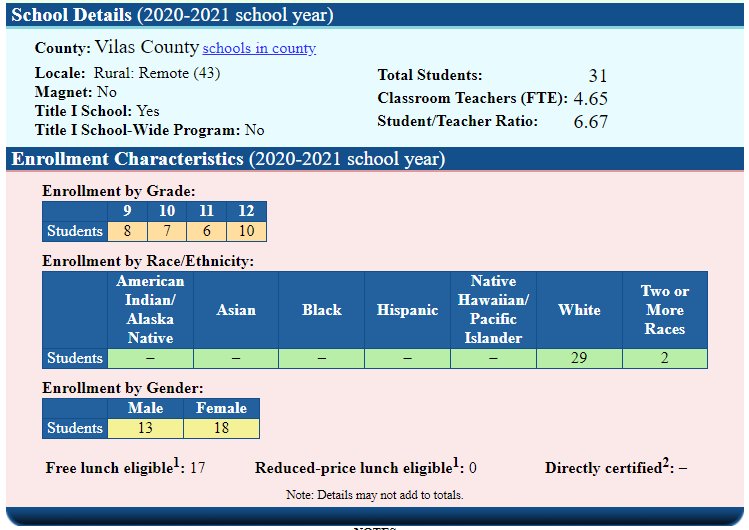

In [44]:
#Source 2: (NCES ED: https://nces.ed.gov/ccd/schoolsearch/)
schoo_level_data=Image.open('IPEDS_Data/Capture.PNG')
schoo_level_data

In [ ]:
# It only includes most recent class size, ethnicity and gender. 
# Not useful to find out which graduate went to which higher-ed institution. 

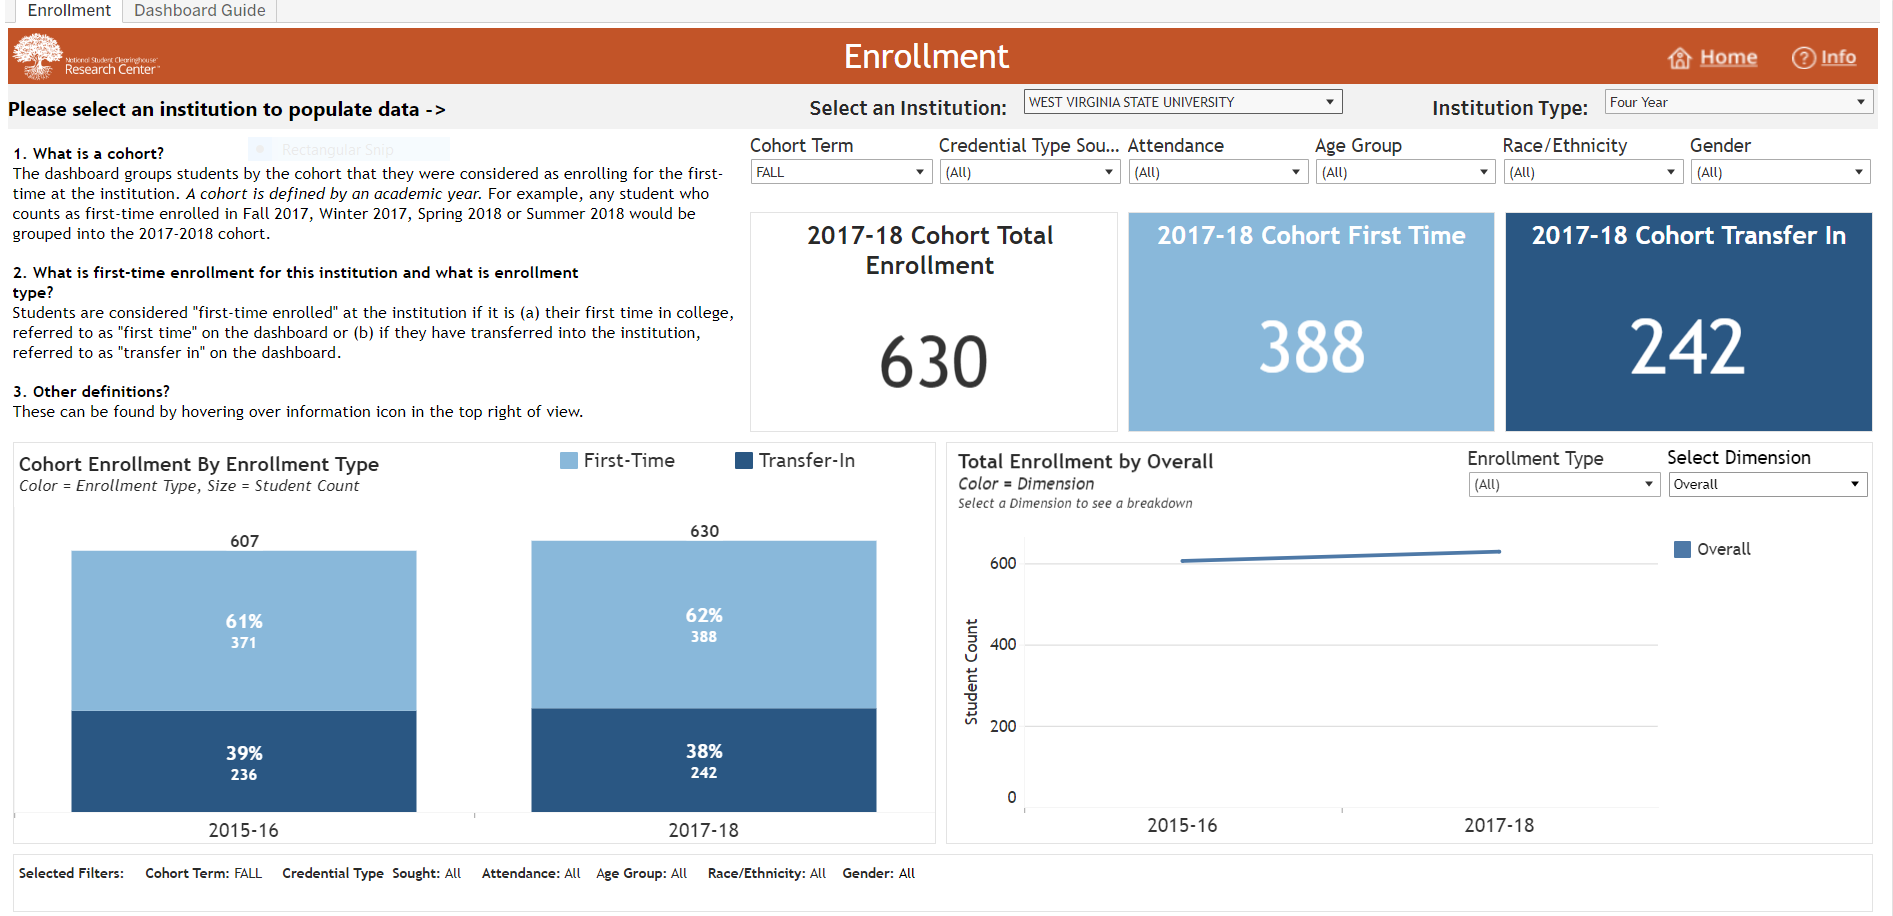

In [46]:
#Source 3: (National Clearing House: https://analytics.studentclearinghouse.org/t/PDP-Public/views/Enrollment/Enrollment?%3Aembed=y&%3Alinktarget=_self)
national_clearing_house_data=Image.open('IPEDS_Data/National clearing house data.PNG')
national_clearing_house_data

In [ ]:
# College level data about race, ethnicity, gender, first time enrollment etc. 
# not useful for indentifying which student came from where so NCES IPEDS data is preferable. 

In [52]:
# Source 4: (Form Your Future: https://formyourfuture.org/fafsa-tracker/)
# Source 5: (Federal Student Aid: https://studentaid.gov/data-center/student/application-volume/fafsa-completion-high-school)
# They both indicate to the same dataset displayed below:
Federal_student_Aid_school_data=pd.read_excel('NCES/FAFSA_completion_16-22/HS_ARCHIVE12312016.xls', sheet_name=0)

In [50]:
Federal_student_Aid_school_data.head()

,Free Application for Federal Student Aid (FAFSA) Submissions by High School \nApplications processed through December 31 of the first year of each cycle,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,2016/ 2017 Cycle,NaN,2015/ 2016 Cycle,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,"Through December 31, 2016",NaN,"Through December 31, 2015",NaN,Through June 2015,NaN,Through December 2015,NaN
2,Name,City,State,Applications\nSubmitted\nDec31 2016,Applications\nComplete\nDec31 2016,Applications\nSubmitted\nDec31 2015,Applications\nComplete\nDec31 2015,Applications\nSubmitted\nJun 2015,Applications\nComplete\nJun 2015,Applications\nSubmitted\nDec 2015,Applications\nComplete\nDec 2015
3,AKIACHAK SCHOOL,AKIACHAK,AK,<5,<5,8,7,<5,<5,8,7
4,AKIUK MEMORIAL SCHOOL,KASIGLUK,AK,5,5,<5,<5,<5,<5,<5,<5


In [53]:
Federal_student_Aid_school_data.head()

,Free Application for Federal Student Aid (FAFSA) Submissions by High School \nApplications processed through December 31 of the first year of each cycle,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,2016/ 2017 Cycle,NaN,2015/ 2016 Cycle,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,"Through December 31, 2016",NaN,"Through December 31, 2015",NaN,Through June 2015,NaN,Through December 2015,NaN
2,Name,City,State,Applications\nSubmitted\nDec31 2016,Applications\nComplete\nDec31 2016,Applications\nSubmitted\nDec31 2015,Applications\nComplete\nDec31 2015,Applications\nSubmitted\nJun 2015,Applications\nComplete\nJun 2015,Applications\nSubmitted\nDec 2015,Applications\nComplete\nDec 2015
3,AKIACHAK SCHOOL,AKIACHAK,AK,<5,<5,8,7,<5,<5,8,7
4,AKIUK MEMORIAL SCHOOL,KASIGLUK,AK,5,5,<5,<5,<5,<5,<5,<5


In [ ]:
# This dataset includes school level and district level FAFSA completion data. 
# District Level data is in percentage of the applicabnt class.
# School level data is in number of student completing FAFSA (does not include class size). 
# Most recent class size from the NCES ED dataset can be used to find the percent completion of most recent class year. 

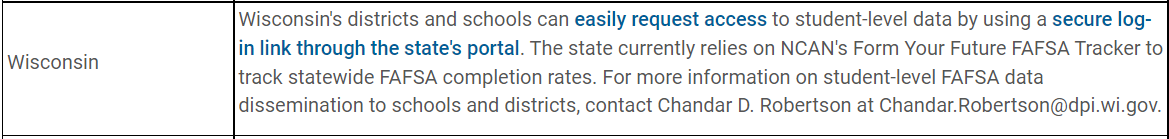

In [54]:
WI_state_policy=Image.open('NCES/FAFSA_completion_16-22/state policy.PNG')
#Source 6: (NCAN: https://www.ncan.org/page/fafsadatasharing)
WI_state_policy

In [ ]:
# Districts, schools and authorized institutions only can acces student level data. 

In [56]:
# Source 7: (WISEdash: https://dpi.wi.gov/wisedash/download-files/type?field_wisedash_upload_type_value=Postsecondary)
WISEdash_postsecondary_enroll_data_layout=gpd.read_file('NCES/WISEdash data/Postsecondary_enrollment/postsecondary_enrollment_current_2019-20_layout.csv')
WISEdash_postsecondary_enroll_data=gpd.read_file('NCES/WISEdash data/Postsecondary_enrollment/postsecondary_enrollment_current_2019-20.csv')

In [62]:
for i in WISEdash_postsecondary_enroll_data_layout['Field Description']:
    print(i)

School year
School/district type
Whether school/district is a charter
Cooperative Educational Service Agency
County of main district office
District code - Unique 4 digit code assigned by DPI
School code - 4 digit code unique within district and assigned by DPI
School grade group. Grade ranges of schools in the same GRADE_GROUP may vary. See also LOW_GRADE and HIGH_GRADE
District name
School name
Timeframe when the students enrolled for postsecondary education for the first time
Students enrolled in Wisconsin or out of Wisconsin based on Institution Location
A classification of whether an institution’s programs are 4-year or higher (4 year), 2 but less than 4-year (2 year), or less than 2-year
A classification of whether an institution is operated by publicly elected or appointed officials or by privately elected or appointed officials and derives its major source of funds from private sources. 
Data group - student attribute name
Data group - student attribute value
Total number of Po

In [65]:
WISEdash_postsecondary_enroll_data

,SCHOOL_YEAR,AGENCY_TYPE,CHARTER_IND,CESA,COUNTY,DISTRICT_CODE,SCHOOL_CODE,GRADE_GROUP,DISTRICT_NAME,SCHOOL_NAME,INITIAL_ENROLLMENT,INSTITUTION_LOCATION,INSTITUTION_LEVEL,INSTITUTION_TYPE,GROUP_BY,GROUP_BY_VALUE,GROUP_COUNT,STUDENT_COUNT,geometry
0,2019-20,,,,,0000,,[All],[Statewide],[Statewide],First Fall,In-State,2-Year,Public,All Students,All Students,32744,7097,None
1,2019-20,,,,,0000,,[All],[Statewide],[Statewide],First Fall,In-State,4-Year,Multiple,All Students,All Students,32744,211,None
2,2019-20,,,,,0000,,[All],[Statewide],[Statewide],First Fall,In-State,4-Year,Private,All Students,All Students,32744,2171,None
3,2019-20,,,,,0000,,[All],[Statewide],[Statewide],First Fall,In-State,4-Year,Public,All Students,All Students,32744,11695,None
4,2019-20,,,,,0000,,[All],[Statewide],[Statewide],First Fall,In-State,Multiple,Multiple,All Students,All Students,32744,314,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63947,2019-20,Public school,No,07,Brown,6734,0040,High School,Wrightstown Community,Wrightstown High,First Fall,Out-of-State,4-Year,Private,Race/Ethnicity,White,83,6,None
63948,2019-20,Public school,No,07,Brown,6734,0040,High School,Wrightstown Community,Wrightstown High,First Fall,Out-of-State,4-Year,Public,Race/Ethnicity,White,83,6,None
63949,2019-20,Public school,No,07,Brown,6734,0040,High School,Wrightstown Community,Wrightstown High,Later Enrollment,In-State,4-Year,Public,Race/Ethnicity,White,83,1,None
63950,2019-20,Public school,No,07,Brown,6734,0040,High School,Wrightstown Community,Wrightstown High,Second Fall,In-State,2-Year,Public,Race/Ethnicity,White,83,3,None


In [66]:
# This dataset includes highschool class year level post secondary enrollment data. 
# From this data it is possible to find the number of students a a highschool sends to different 
# types of postsecondary institutions.
# Still no student level identificantion number that can seperate students such as: 
### 1. Didn't complete FAFSA but went to college
### 2. Didn't complete FAFSA and did not go to college. 
### 3. Did complete FAFSA and went to college.
### 4. Did complete FAFSA but didn't go to college. 

In [67]:
# Source 8: (NCES Oopendata: https://data-nces.opendata.arcgis.com/search?collection=Dataset&groupIds=455147561fd3416daa180395fb4e9237)
NCES_Openddata_school_Characterisrics=gpd.read_file('NCES/School_properties/Public_School_Characteristics_2018-19.csv')

In [69]:
NCES_Openddata_school_Characterisrics.columns
# The variable names in the dataset

Index(['X', 'Y', 'NCESSCH', 'SURVYEAR', 'STABR', 'LEAID', 'ST_LEAID',
       'LEA_NAME', 'SCH_NAME', 'LSTREET1', 'LSTREET2', 'LCITY', 'LSTATE',
       'LZIP', 'LZIP4', 'PHONE', 'GSLO', 'GSHI', 'VIRTUAL', 'TOTFRL', 'FRELCH',
       'REDLCH', 'PK', 'KG', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07',
       'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'TOTAL', 'MEMBER', 'AM', 'HI',
       'BL', 'WH', 'HP', 'TR', 'FTE', 'LATCOD', 'LONCOD', 'ULOCALE', 'NMCNTY',
       'STUTERATIO', 'TITLEI', 'STITLEI', 'AMALM', 'AMALF', 'ASALM', 'ASALF',
       'HIALM', 'HIALF', 'BLALM', 'BLALF', 'WHALM', 'WHALF', 'HPALM', 'HPALF',
       'TRALM', 'TRALF', 'TOTMENROL', 'TOTFENROL', 'STATUS', 'UG', 'AE',
       'SCHOOL_TYPE_TEXT', 'SY_STATUS_TEXT', 'SCHOOL_LEVEL', 'AS',
       'CHARTER_TEXT', 'MAGNET_TEXT', 'OBJECTID', 'geometry'],
      dtype='object')

In [ ]:
# This dataset has data related to public school characteristics (but did not include an elaborated version of 
# the variable name.
# This is the data file I used to find the TITLE-I high schools. 
# It is also useful becuase it comes with geometric property for spatial map plots which the nces IPEDS and ED data don't.

In [73]:
# Source 12: Homeland Infrastructure Foundation Level: https://hifld-geoplatform.opendata.arcgis.com/datasets/0d7bedf9d582472e9ff7a6874589b545_0/explore?location=8.039159%2C0.317634%2C2.26
College_location_shapefile=gpd.read_file('NCES/Colleges_and_Universities/CollegesUniversities.shp')
College_location_shapefile=College_location_shapefile[College_location_shapefile['STATE']=='WI']


<AxesSubplot:>

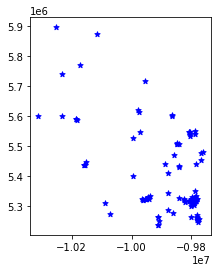

In [75]:
College_location_shapefile.plot(color = 'blue', marker='*', markersize=30, legend = False)

In [76]:
# This dataset was used to find the location of the higher-ed institutions in WI (shape file).

In [77]:
# Source 13: (US News: https://www.usnews.com/education/best-high-schools/wisconsin/districts/madison-metropolitan-school-district/east-high-school-21681)
US_news_class_size_data=Image.open('US_News_data/US news class size.PNG')
US_news_ethnicity_demography_data=Image.open('US_News_data/US news ethnicity and demography.PNG')

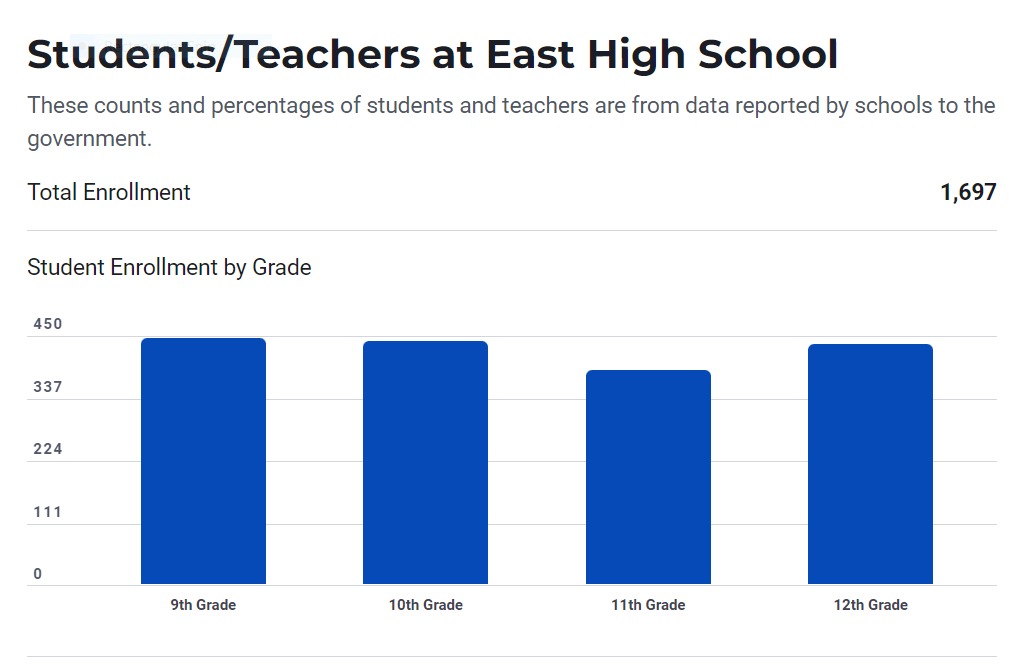

In [81]:
US_news_class_size_data

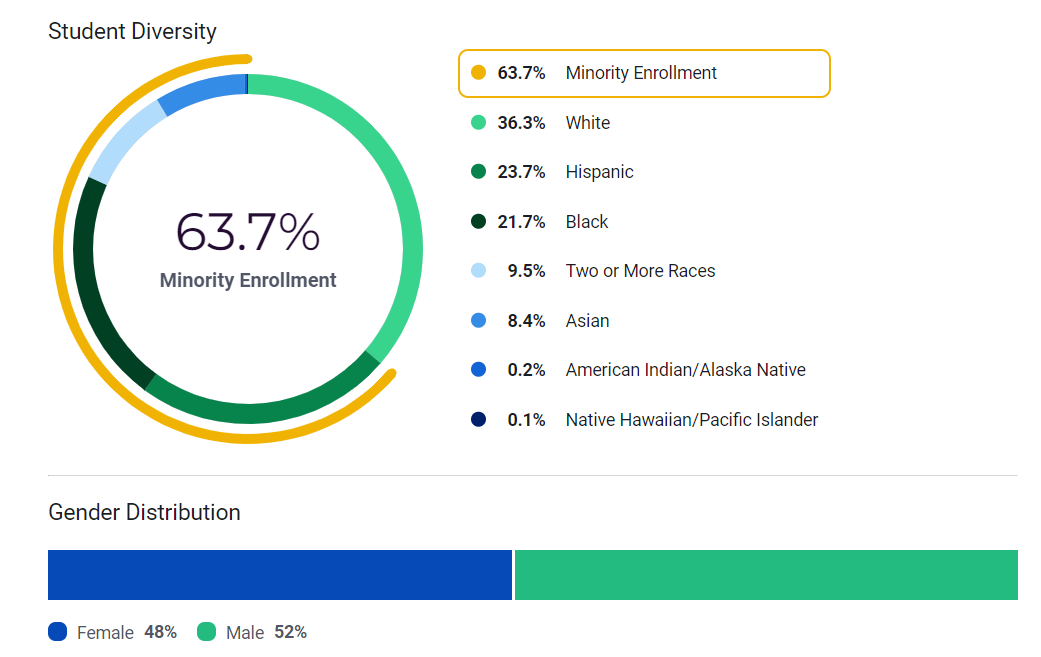

In [79]:
US_news_ethnicity_demography_data

In [ ]:
# This data is similar to the NCES ED website data of individual high school. 